### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [58]:
# lets import libraries and read the dataset
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [59]:
df = pd.read_csv("/content/glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [60]:
# lets find out basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [61]:
# shape
df.shape

(214, 10)

In [62]:
# lets use describe function
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [63]:
# lets find null values and duplicate value if present in the data
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [64]:
df.duplicated().any()

True

In [65]:
#lets drop duplicated values
df.drop_duplicates(inplace = True)

In [66]:
df.shape

(213, 10)

#### observation:- only 1 single row has duplicated so we drop to that

In [67]:
# lets do sepration of target and feature columns
X = df.drop('Type', axis = 1)
y = df['Type']

In [68]:
# lets call to train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=2)

In [69]:
X_train.shape

(170, 9)

In [70]:
X_test.shape

(43, 9)

In [71]:
y_train.shape

(170,)

In [72]:
y_test.shape

(43,)

In [73]:
# calling min max scler beaucase we seen all material having in different differnet scale so
# so we will make in same scale.

min_scaler = MinMaxScaler()
X_train = min_scaler.fit_transform(X_train)
X_test = min_scaler.fit_transform(X_test)

In [74]:
X_train

array([[0.28446005, 0.28270677, 0.79955457, ..., 0.28531599, 0.        ,
        0.        ],
       [0.48112379, 0.52030075, 0.84187082, ..., 0.34479554, 0.        ,
        0.7254902 ],
       [0.28709394, 0.25864662, 0.60356347, ..., 0.33736059, 0.        ,
        0.47058824],
       ...,
       [0.22651449, 0.3924812 , 0.79510022, ..., 0.22862454, 0.        ,
        0.        ],
       [0.28358209, 0.31278195, 0.78841871, ..., 0.27509294, 0.        ,
        0.        ],
       [0.38586479, 0.38195489, 0.        , ..., 0.54739777, 0.        ,
        0.        ]])

In [75]:
X_test.shape

(43, 9)

In [76]:

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [77]:
def knn_func(train_x, train_label, test_x, k):
    """
    train_x - train features
    train_label - train targets
    test_x - validation data(features)
    k - nearest neighbours <int>
    """
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_x, train_label)
    prediction = knn.predict(test_x)
    return prediction

In [78]:
import math
n = df.shape[0]
k_max = math.sqrt(n)
k_max

14.594519519326424

In [79]:
import matplotlib.pyplot as plt


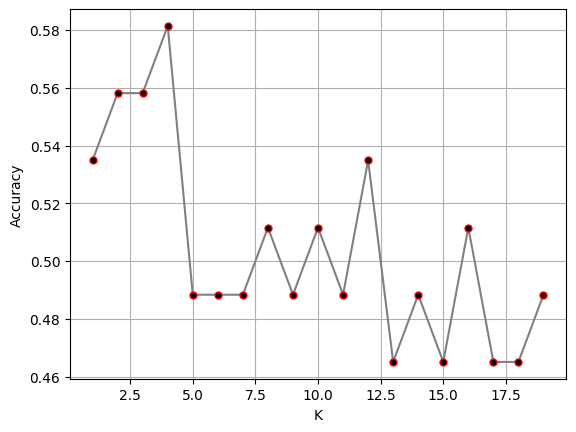

In [81]:
normal_accuracy = []
k_values = range(1,20)

for k in k_values :
    y_pred = knn_func(X_train,y_train,X_test,k)
    accur = accuracy_score(y_test,y_pred)
    normal_accuracy.append(accur)

plt.plot(k_values,normal_accuracy,c="grey",marker=".",ms=10,mfc="black",mec="red")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

* From above graph of Accuracy vs K, best value for **n_beighbours is 4.5**.